### Objective functions for a Schlumberger sounding

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pygimli as pg
from pygimli.physics.ert import VESModelling

We consider a Schlumberger sounding with AB/2 values between 3 and 1000m.

In [2]:
ab2 = np.logspace(0.5, 3, 50)
ves = VESModelling(ab2=ab2, mn2=ab2/3)

We assume a 3-layer model with a bad conductor embedded into a medium resistive halfspace and later a good conductor.

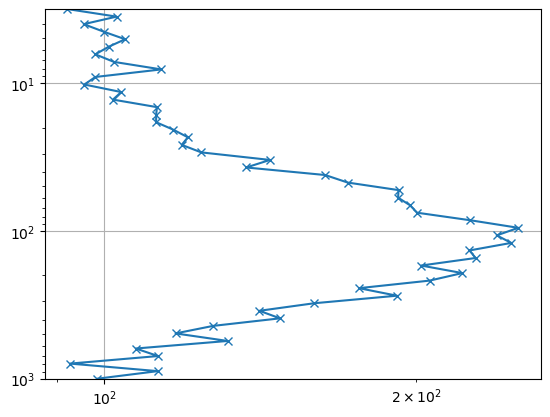

In [3]:
model = [20, 20, 100, 1000, 100]  # d1, d2, r1, r2, r3
data = ves.response(model)
error = 0.05
data *= np.random.randn(len(data)) * error + 1.0
fig, ax = plt.subplots()
ax.loglog(data, ab2, "x-");
ax.set_ylim(max(ab2), min(ab2))
plt.grid()

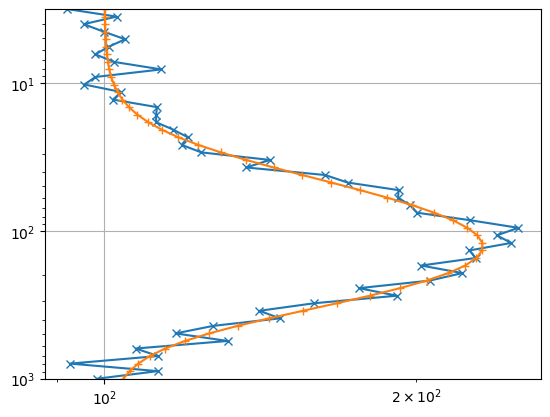

In [4]:
model[1] += 10  # d2
model[3] *= 0.7  # rho2
response = ves.response(model)
fig, ax = plt.subplots()
ax.loglog(data, ab2, "x-");
ax.loglog(response, ab2, "+-");
ax.set_ylim(max(ab2), min(ab2))
plt.grid()

Apparently the model seems to be equivalent within error bounds.

In [5]:
phiD = lambda x, y, err: np.sum((np.log(x)-np.log(y))**2/err**2)
print("phiD=", phiD(data, response, error))
print("chi2=", phiD(data, response, error)/len(data))

phiD= 68.23944960987798
chi2= 1.3647889921975596


Now we consider a series of values for d2 and rho2 and save the objective function for all combinations in a matrix that can then be shown with the function `showPhiD`:

In [6]:
def showPhiD(x, y, mat, xlabel=r"$\rho_2$ ($\Omega$m)", ylabel=r"$d_2$ (m)"):
    fig, ax = plt.subplots()
    im = ax.matshow(np.log10(mat), cmap="Spectral_r", vmin=1.5, vmax=4.5)
    xt = np.arange(0, len(x), 5)
    xtl = ["{:.0f}".format(np.round(xx)) for xx in x[xt]]
    yt = np.arange(0, len(y), 5)
    ytl = ["{:.0f}".format(np.round(yy)) for yy in y[yt]]
    plt.xticks(xt, xtl)
    plt.yticks(yt, ytl)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.xaxis.set_ticks_position("bottom")
    cb = plt.colorbar(im)

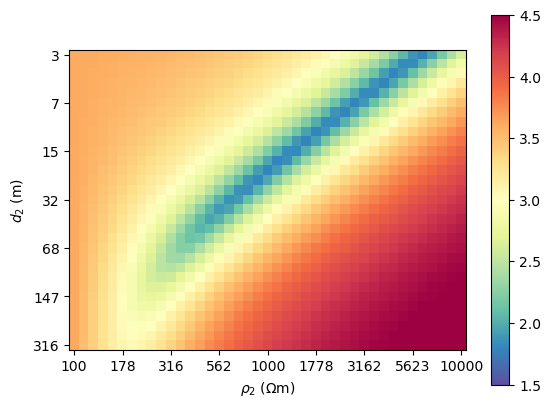

In [7]:
thk2 = np.logspace(0.5, 2.5, 31)
res2 = np.logspace(2, 4, 41)
M = np.zeros((len(thk2), len(res2)))
for i, model[1] in enumerate(thk2):
    for j, model[3] in enumerate(res2):
        M[i, j] = phiD(data, ves.response(model), error)

showPhiD(res2, thk2, M);

In [8]:
print("phiD\tthk\tres\tRhoT")
for i, t in enumerate(thk2):
    ind = np.argmin(M[i, :])
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(M[i, ind], t, res2[ind], t*res2[ind]))

phiD	thk	res	RhoT
63.03	3.16	6309.57	19952.62
66.01	3.69	5011.87	18478.50
62.55	4.30	4466.84	19201.42
62.85	5.01	3981.07	19952.62
66.08	5.84	3162.28	18478.50
62.45	6.81	2818.38	19201.42
62.48	7.94	2511.89	19952.62
66.22	9.26	2238.72	20733.22
62.40	10.80	1778.28	19201.42
61.86	12.59	1584.89	19952.62
64.74	14.68	1412.54	20733.22
63.39	17.11	1122.02	19201.42
62.20	19.95	1000.00	19952.62
64.18	23.26	891.25	20733.22
69.30	27.12	794.33	21544.35
72.94	31.62	630.96	19952.62
78.42	36.87	562.34	20733.22
89.40	42.99	501.19	21544.35
107.38	50.12	446.68	22387.21
134.62	58.43	398.11	23263.05
174.34	68.13	354.81	24173.15
225.04	79.43	354.81	28183.83
282.86	92.61	316.23	29286.45
360.99	107.98	281.84	30432.20
458.59	125.89	281.84	35481.34
553.88	146.78	251.19	36869.45
679.60	171.13	251.19	42986.62
786.16	199.53	223.87	44668.36
914.36	232.63	223.87	52079.48
1031.83	271.23	199.53	54116.95
1136.58	316.23	199.53	63095.73


We can define an upper limit for the thickness of about 30m and a lower limit for the resistivity of about 600$\Omega$m. Otherwise, all models with the 
same product (about 20k$\Omega$m$^2$) resistivity and thickness are equivalent. This kind of equivalence is known as S equivalence and the transverse resistance.

Now we do the same for a good conducting middle layer.

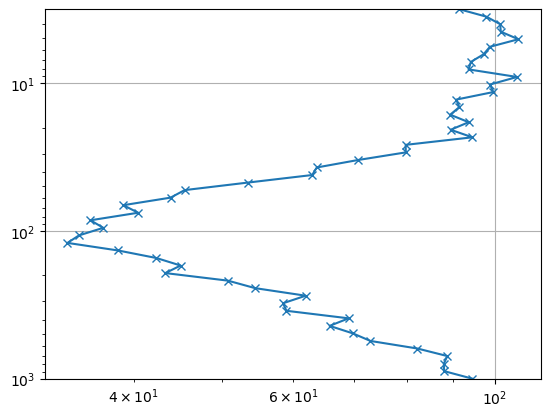

In [9]:
model = [20, 20, 100, 10, 100]  # d1, d2, r1, r2, r3
data = ves.response(model)
error = 0.05
data *= np.random.randn(len(data)) * error + 1.0
fig, ax = plt.subplots()
ax.loglog(data, ab2, "x-");
ax.set_ylim(max(ab2), min(ab2))
plt.grid()

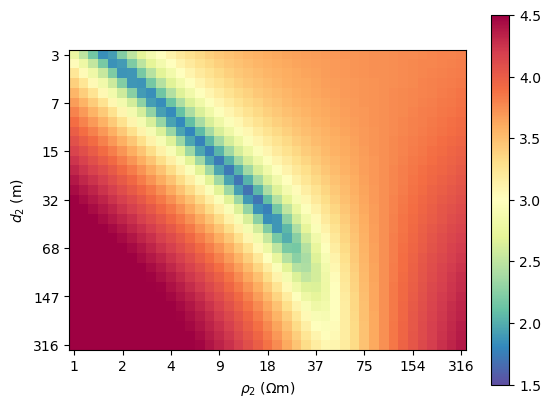

In [10]:
thk2 = np.logspace(0.5, 2.5, 31)
res2 = np.logspace(0, 2.5, 41)
M = np.zeros((len(thk2), len(res2)))
for i, model[1] in enumerate(thk2):
    for j, model[3] in enumerate(res2):
        M[i, j] = phiD(data, ves.response(model), error)

showPhiD(res2, thk2, M);

In [11]:
print("phiD\tthk\tres\tsigmaT")
for i, t in enumerate(thk2):
    ind = np.argmin(M[i, :])
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(M[i, ind], t, res2[ind], t/res2[ind]))

phiD	thk	res	sigmaT
70.06	3.16	1.54	2.05
71.95	3.69	1.78	2.07
74.13	4.30	2.05	2.09
73.47	5.01	2.74	1.83
70.92	5.84	3.16	1.85
68.59	6.81	3.65	1.87
66.41	7.94	4.22	1.88
64.35	9.26	4.87	1.90
62.30	10.80	5.62	1.92
60.21	12.59	6.49	1.94
57.98	14.68	7.50	1.96
55.59	17.11	8.66	1.98
53.11	19.95	10.00	2.00
50.90	23.26	11.55	2.01
49.75	27.12	13.34	2.03
51.32	31.62	15.40	2.05
58.61	36.87	17.78	2.07
69.54	42.99	17.78	2.42
75.73	50.12	20.54	2.44
98.91	58.43	23.71	2.46
151.13	68.13	27.38	2.49
186.87	79.43	27.38	2.90
263.18	92.61	31.62	2.93
334.38	107.98	31.62	3.41
448.80	125.89	36.52	3.45
536.98	146.78	36.52	4.02
666.54	171.13	36.52	4.69
797.33	199.53	42.17	4.73
910.72	232.63	42.17	5.52
1044.80	271.23	42.17	6.43
1192.21	316.23	42.17	7.50


We can define upper limits for both the resistivity (of 30$\Omega$m) and the thickness (of 15m). Otherwise, all models with the same ratio of about 2S between resistivity and thickness are equivalent. This kind of equivalence is known as T equivalence and the ratio is the longitudinal conductance.